In [1]:
# importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Data collection and processing
loan_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_u6lujuX_CVtuZ9i (1).csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Credit_History --> 1 means good credit history; 0 means poor credit history


In [3]:
loan_dataset.shape

(614, 13)

In [4]:
# descriptive data
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_dataset.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002832,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
# to find if there is null values
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# filling the missing values for numerical terms with respective column 'mean'
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mean())
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0]) # as only 0 and 1 values are there


In [9]:
loan_dataset['Gender'] = loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0])
loan_dataset['Married'] = loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0])
loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0])
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0])


In [10]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
loan_dataset.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [12]:
# label encoding
loan_dataset.Loan_Status.replace({'N':0,'Y':1}, inplace=True)

In [13]:
loan_dataset.Loan_Status.unique()

array([1, 0])

In [14]:
# dependant column values
loan_dataset['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
# replacing the values of 3+ to a value higher than 3, to tranform the datatype of column "Dependents"
loan_dataset.Dependents = loan_dataset.Dependents.replace({'3+':4})
# loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [17]:
# checking if the changes has taken place
loan_dataset['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [21]:
loan_dataset.Dependents = loan_dataset.Dependents.astype('int64')
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


### Data Visualization

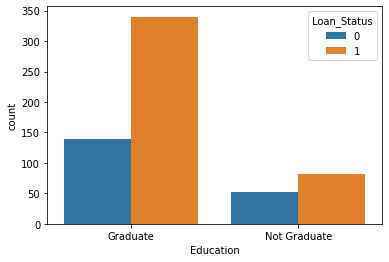

In [24]:
# Education vs Loan_Status
import seaborn as sns
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)
# 0 - loan didn't got approved
# 1 - loan approved

# more loan approvals for graduated people

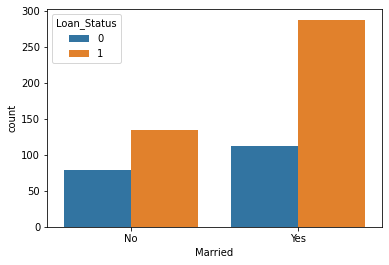

In [26]:
# Marital status vs loan status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

# Inference: Married people are getting more loan approvals

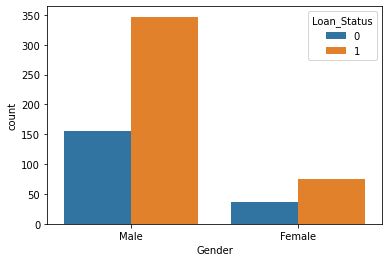

In [27]:
# Gender vs loan status
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dataset)

# Inference: Male people are getting more loan approvals

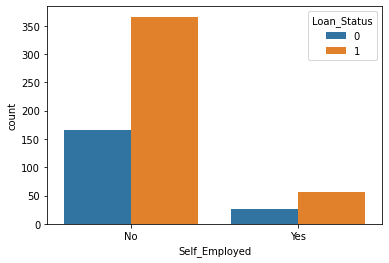

In [28]:
# Self_Employed vs loan status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_dataset)

# Inference: Employed (not Self_Employed) people are getting more loan approvals

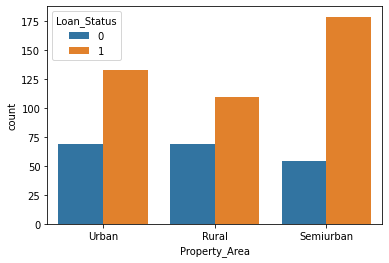

In [29]:
# Property_Area vs loan status
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_dataset)

# Inference: all categories are getting almost equal oppurtunities

### Converting Categorical columns to Numerical Values

In [30]:
# we will use label encoding, as from above visualisation we can see one category has got more preference compared to the other for few columns
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':1,'Yes':0},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [31]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,1,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,1,6000,0.0,141.000000,360.0,1.0,2,1


In [32]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [33]:
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = loan_dataset.Loan_Status

In [34]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,1,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,1,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,0,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,1,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,1,6000,0.0,141.000000,360.0,1.0,2


In [35]:
# splitting the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
# stratified sampling, to distribute data proportionally

In [36]:
print(x_train.shape, x_test.shape, X.shape)

(491, 11) (123, 11) (614, 11)


In [37]:
# we will use SVM classifier
classifier = svm.SVC(kernel='linear')

In [38]:
# training the SVM model
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Model Evaluation

In [39]:
# accuracy score on training data
x_train_prediction = classifier.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)
print(f"Accuracy on training data: {train_data_accuracy}")

Accuracy on training data: 0.8044806517311609


In [40]:
# accuracy on train data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

print(f"Accuracy on test data: {test_data_accuracy}")

# as accuracy is high on both test and training data, so no overfitting

Accuracy on test data: 0.8130081300813008
